# Exercício - Aula 3 (07/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

### 1) Implemente sua própria função de cálculo de histograma apresentando o código em Python;

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Função própria 

def calc_histogram(image):
    hist = []

    # Certificar que a imagem está em 1D
    img_array = image.flatten()

    # Contagem de pixels com determinados valores a partir da iteração da imagem
    for i in range(256):
        hist.append(img_array.tolist().count(i)) 

    return hist

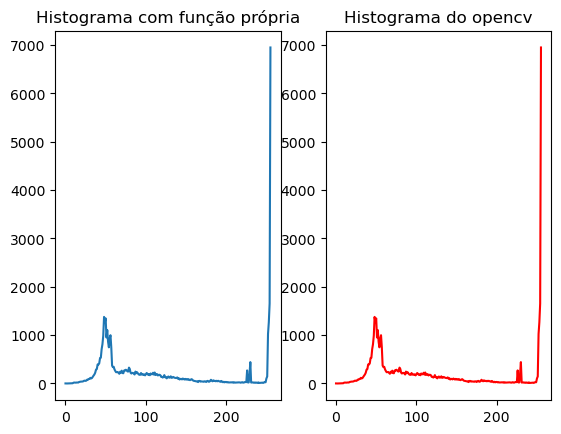

In [5]:
# Demonstração da função

img = cv2.imread('images\\pimenta.jpg',0)

hist = calc_histogram(img)
cv2_hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.subplot(121)
plt.plot(hist)
plt.title('Histograma com função própria')
plt.subplot(122)
plt.plot(cv2_hist, 'r')
plt.title('Histograma do opencv')
plt.show()

### 2) Aplique a equalização em diferentes imagens e no exemplo apresentado no livro do Gonzalez para demonstrar o funcionamento da função;

Faça os gráficos dos histogramas de entradas e saída, bem como a função T(r)

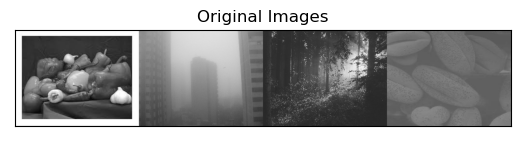

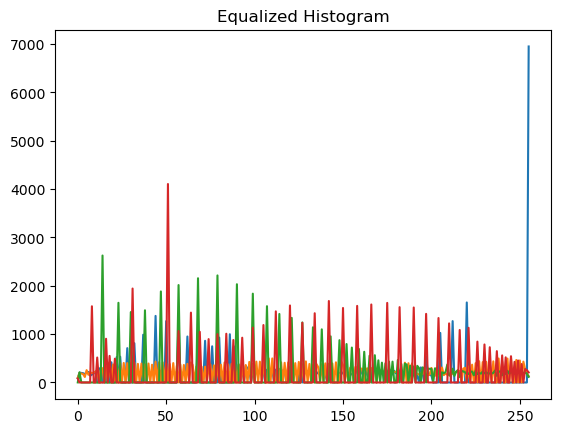

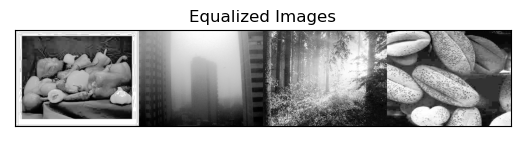

In [6]:
# Aplicando em 4 imagens diferentes 

img1 = cv2.imread('images\\pimenta.jpg',0)
img2 = cv2.imread('images\\fog.jpg',0)
img3 = cv2.imread('images\\forest.jpg',0)
img_gonzales = cv2.imread('images\\polen_gonzales.png',0)

# igualando dimensões
img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))
img3 = cv2.resize(img3, (img1.shape[1],img1.shape[0]))
img_gonzales = cv2.resize(img_gonzales, (img1.shape[1],img1.shape[0]))

# Equalizando os Histogramas
img1_equalized = cv2.equalizeHist(img1)
img2_equalized = cv2.equalizeHist(img2)
img3_equalized = cv2.equalizeHist(img3)
img_gonzales_equalized = cv2.equalizeHist(img_gonzales)

res = np.hstack((img1,img2,img3,img_gonzales)) #Coloca imagem uma do lado da outra
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.title('Original Images')
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

# Plotar histogramas da equalização
hist1 = calc_histogram(img1_equalized)
hist2 = calc_histogram(img2_equalized)
hist3 = calc_histogram(img3_equalized)
hist_gonzales = calc_histogram(img_gonzales_equalized)
plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)
plt.plot(hist_gonzales)
plt.title('Equalized Histogram')
plt.show()

res_equalized = np.hstack((img1_equalized,img2_equalized,img3_equalized,img_gonzales_equalized)) #Coloca imagem uma do lado da outra
res_equalized = cv2.cvtColor(res_equalized, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.title('Equalized Images')
plt.imshow(res_equalized)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()


### 3) Implemente a sua função de segmentação por limiar, calculando o limiar ótimo conforme apresentado no livro do Gonzalez.
O cáculo automático do limiar ótimo pode ser feito pelo método de Otsu.

In [8]:
# Otsu's thresholding
def threshold_por_limiar(image):
    # Criar cópia da umagem
    thresh = np.copy(image)

    # Iterar na imagem com limiar de 127
    for column in range(image.shape[1]):
        for line in range(image.shape[0]):
            if image[line][column] < 256/2:
                thresh[line][column] = 0
            else:
                thresh[line][column] = 1

    return thresh

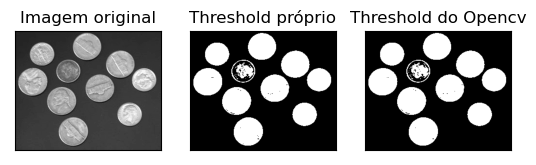

In [11]:
img = cv2.imread('D:\Github\Geral\VisComp22\Aula3\images\coins.jpg', 0)

thresh = threshold_por_limiar(img) # Função própria

ret,cv2_thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Função do Opencv

titles = ['Imagem original', 'Threshold próprio', 'Threshold do Opencv']
images = [img, thresh, cv2_thresh]

# Plotar todas as imagens
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4) Faça uma versão que considere a aplicação da segmentação adaptativa 
Para segmentação adaptativa, não estaremos mais tratando de apenas um limiar T, mas de limiares locais que levam em consideração os valores de vizinhos.

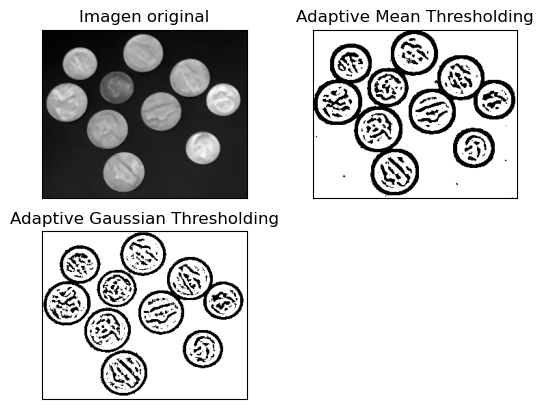

In [12]:
img = cv2.imread('D:\Github\Geral\VisComp22\Aula3\images\coins.jpg', 0)

# Deixar a imagem mais borrada, para impedir que haja valores concentrados muito altos. Isso ajuda a ter um threshold mais 'limpo'
img = cv2.medianBlur(img,5)


# Fórmula com média aritmética
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Fórmula com média Gaussiana
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


titles = ['Imagem original', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th2, th3]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()